# Introduktion til pandas data frames (live coding)

Pakken `pandas` (https://pandas.pydata.org/) er et Python bibliotek til datahåndtering og dataanalyse. Pandas egner sig særligt til data i tabeller struktureret i rækker og kolonner. En datatabel kaldes inden for pandas en "DataFrame"; et bestemt Python objekt specifikt til at lagre og bearbejde data i tabeller.

Denne lektion gennemgår diverse basale funktioner til at indlæse, udforske og håndtere en pandas data frame. Se også den officielle dokumentation for flere guides, introduktioner og beskrivelser til at arbejde med pandas: https://pandas.pydata.org/docs/

## Indlæs data med `pandas`

`pandas` pakken indeholder funktioner til at indlæse data i forskellige formater; herunder CSV, JSON, Excel, Stata, SAS osv.

I det nedenstående indlæses pandas biblioteket, hvorefter datasættet "eurobarometer-96_dk_subset.csv" indlæses.

In [2]:
import pandas as pd

eurob = pd.read_csv("https://github.com/CALDISS-AAU/sds-ss-2024/raw/master/datasets/eurobarometer-96_dk_subset.csv")

*Bemærk importkonventionerne for `pandas`. `pandas` typisk som `pd`.*

**Navngivning af datasæt**

Der er forskellige præferencer og holdninger til, hvordan man bør navngive sine objekter. 

Som hovedregel bør man gå efter navne, som både er relativt korte (man kan ende med at skulle skrive det mange gange) og som er sigende for, hvad objektet indeholder.

Dog kan man også argumentere for at navngive meget generisk, sådan at ens kode kan anvendes på andet data.

### Om datasættet
Datasættet, som indlæses her, er et uddrag af datasættet fra Eurobarometer 96.1 fra 2021 (https://search.gesis.org/research_data/ZA7846).

Eurobarometer er en gentaget holdningsundersøgelse, der både indeholder standardrunder og "specialrunder", hvor der sættes fokus på specifikke temaer. I Eurobarometer 96.1 sættes bl.a. fokus på "Future of Europe, and Digital rights and principles ". I dette uddrag er der kun inkluderet de danske respondenter og et mindre udpluk variable.

I kan finde en variabel-beskrivelse i fællesmappen på UCloud under mappen "doc": `varlist_eurobarometer-96_dk_subset.pdf`.

## Inspicer data med `pandas`

Datasættet er nu indlæst som et dataframe objekt i Python, som man kan interagere med. 

Metoden `.head()` printer de første fem rækker af datasættet:

In [96]:
eurob.head()

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d10,d15a,d15b,d25,d63,d1,p1,p2,p3,region_denmark
0,110005573,71,Not at all,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Man,"Retired, unable to work","Middle management, etc.",Large town,The middle class of society,9,16 Sep 21,13 - 16 h,2099,DK05 - Nordjylland
1,110005574,23,Medium,Very important,Use of personal data and information by compan...,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Man,Student,"Unskilled manual worker, etc.",Large town,The middle class of society,6,16 Sep 21,17 - 19 h,2784,DK05 - Nordjylland
2,110005575,53,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,Not mentioned,Not mentioned,Not mentioned,...,Woman,"Unskilled manual worker, etc.",Inap. (not 1 to 4 in d15a),Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,1738,DK02 - Sjaelland
3,110005576,70,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,Man,"Retired, unable to work","Middle management, etc.",Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,2759,DK02 - Sjaelland
4,110005577,71,Medium,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Woman,"Employed position, service job",Inap. (not 1 to 4 in d15a),Small/middle town,The working class of society,5,17 Sep 21,8 - 12 h,1768,DK01 - Hovedstaden


Dataframes er et tabulært dataformat. Når en fil indlæses som en pandas dataframe, skal filen derfor være i et format, der kan konverteres til tabelformat (data i rækker og kolonner).

I dette datasæt udgør observationerne (rækkerne) enkeltpersoner, som har besvaret spørgeskemaet. De enkelte kolonner indeholder oplysninger om de enkelte personer. 

### Kolonner/variable 

En dataframe består af en samling af kolonner. En kolonne i en dataframe kaldes en `series`.

Navnene på kolonnerne, som en dataframe indeholder, kan ses af attributen `.columns`:

In [97]:
eurob.columns

Index(['uniqid', 'd11', 'polintr', 'qb1', 'qb3_1', 'qb3_2', 'qb3_3', 'qb3_4',
       'qb3_5', 'qb3_6', 'qb3_7', 'd7r', 'd9b', 'd10', 'd15a', 'd15b', 'd25',
       'd63', 'd1', 'p1', 'p2', 'p3', 'region_denmark'],
      dtype='object')

## Inspicer variable

En enkelt variabel/kolonne i datasættet referes til med `[]`:

In [98]:
eurob['polintr'].head()

0    Not at all
1        Medium
2        Medium
3        Medium
4        Medium
Name: polintr, dtype: object

Vi kan bruge en metode som `.value_counts()` til at optælle værdierne inden for én kolonne:

In [99]:
eurob['polintr'].value_counts()

Medium        508
Strong        234
Low           159
Not at all     92
Name: polintr, dtype: int64

# Udforskning af data (live coding)

## Visualisering med `pandas`

`pandas` dataframes har en række indbyggede metoder til at plotte enkelte variable. 

Vi kan fx bruge metoden `.plot.hist()` til at lave et histogram:

<Axes: ylabel='Frequency'>

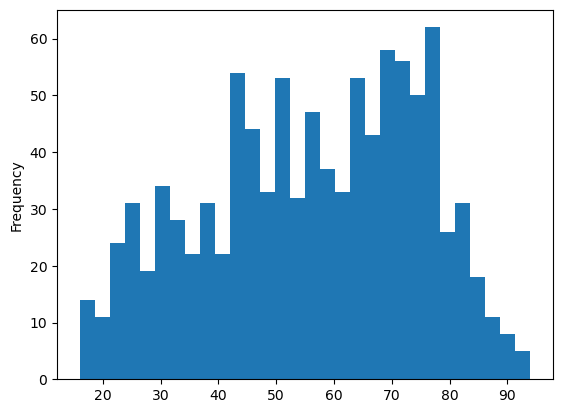

In [9]:
eurob['d11_num'] = pd.to_numeric(eurob['d11'], errors = "coerce")

eurob['d11_num'].plot.hist(bins = 30)

`.plot.bar()` kan bruges til at lave søjlediagrammer over optællinger fra `.value_counts()` :

<Axes: xlabel='polintr'>

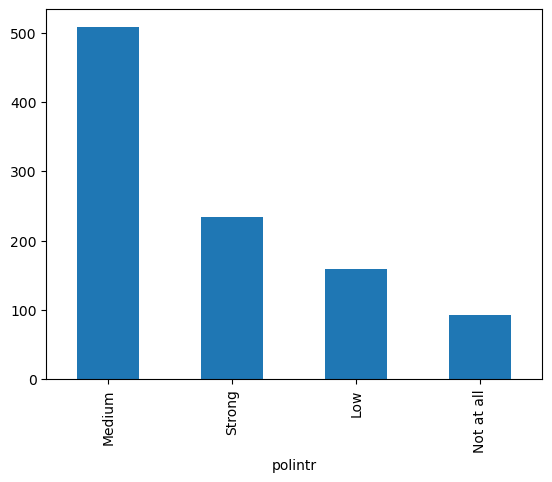

In [10]:
eurob['polintr'].value_counts().plot.bar()

## Deskriptive mål

Metoden `.describe()` danner deskriptive mål for alle (kompatible) variable i datasættet:

In [11]:
eurob.describe()

,uniqid,p3,d11_num
count,9.930000e+02,993.000000,990.000000
mean,1.100106e+08,2628.954683,55.892929
std,8.289165e+03,2501.948407,18.623747
min,1.100056e+08,709.000000,16.000000
25%,1.100058e+08,1839.000000,42.000000
50%,1.100061e+08,2308.000000,57.000000
75%,1.100063e+08,2925.000000,72.000000
max,1.100265e+08,64628.000000,94.000000


Metoden fungerer også på enkeltvariable:

In [12]:
eurob['d11_num'].describe()

count    990.000000
mean      55.892929
std       18.623747
min       16.000000
25%       42.000000
50%       57.000000
75%       72.000000
max       94.000000
Name: d11_num, dtype: float64

`.describe()` danner følgende mål:
- `count`: Antal svar ekskl. missing
- `mean`: Middelværdien
- `std`: Standardafvigelsen
- `min`: Minimumværdien
- `25%`: 1. kvartil
- `50%`: 2. kvartil
- `75%`: 3. kvartil
- `max`: Maksimumværdien

Der knytter sig også en række metoder til at danne de enkelte deskriptive mål.

Herunder printes fx middelværdien, standardafvigelsen, minimums- og maksimumsværdien for variablen `weight`:

In [13]:
print(eurob['d11_num'].mean())
print(eurob['d11_num'].std())
print(eurob['d11_num'].min())
print(eurob['d11_num'].max())

55.892929292929296
18.623746502156678
16.0
94.0


## Split-apply-combine

![sac](https://unlhcc.github.io/r-novice-gapminder/fig/12-plyr-fig1.png)

*Billede fra [Software Carpentry](https://unlhcc.github.io/r-novice-gapminder/16-plyr/)*

## Split-apply-combine

**Split**: Opdel (split) data i grupper baseret på et eller flere kriterier.

**Apply**: Anvend (apply) en funktion (fx en beregning, filtrering eller andet) til hver gruppering.

**Combine**: Kombinér (combine) resultaterne til en ny datastruktur.

In [14]:
eurob.groupby(['d10'])['d11_num'].mean().to_frame().reset_index()

,d10,d11_num
0,Man,56.955166
1,Woman,54.750524


**Split**: `.groupby()` - Hvilke variable skal der grupperes efter? (her `d10` - køn).

**Apply**: `.mean()` - Funktion der anvendes på hver gruppering (her middelværdi for `d11` - alder).

**Combine**: Pandas returnerer automatisk en ny datastruktur ved brug af en funktion. Dog kan strukturen tilpasses.
- `.to_frame()` - Tving om til data frame
- `.reset_index()` - Nulstil index (rækkenavne)

## Split-apply-combine med pandas (groupby)

Her skal vi se på nogen forskellige måder, hvor der kan udregnes deskriptive mål og dannes visualiseringer for grupper i data

Vi starter med at indlæse de nødvendige pakker og data. Aldersvariablen (som også blev tilføjet i lektion 3) tilføjes igen:

### Brug af split-apply til at opsummere data (aggregeringer)

Metoden `.groupby()` grupperer datasæt efter de givne variable:

In [130]:
grouped_df = eurob.groupby(['d10'])

Selve objektet, som bliver dannet, indeholder ikke information, der bare kan kaldes frem direkte:

In [131]:
grouped_df

Dog kan vi danne de samme deskriptive mål, som vi kan for hele datasættet, men hvor de opsummeres på gruppeniveauet:

In [132]:
grouped_df.mean()

,uniqid,d11,p3,inwth,inwtm
d10,,,,,
Man,1.100101e+08,56.792233,2593.071705,43.217862,43.217862
Woman,1.100111e+08,54.750524,2667.771488,44.462858,44.462858


Det samme kan gøres for enkeltvariable:

In [133]:
grouped_df['d11_num'].mean()

d10
Man      56.792233
Woman    54.750524
Name: d11, dtype: float64

En lang række metoder kan bruges på grupperede data. Se dem alle her: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html.

- `mean()`: Middelværdi for grupperne

- `size()`: Størrelse af grupperne

- `count()`: Tællinger inden for grupperne

- `describe()`: Deskriptive mål inden for grupperne

- `min()`: Minimum for grupperne

- `max()`: Maximum for grupperne

Metoden `value_counts()` kan bruges til at lave optællinger af kategoriske inden for grupperne.

Herunder laves optælling for variablen `vote` fordelt på køn:

In [134]:
grouped_df['polintr'].value_counts()

d10    polintr   
Man    Medium        268
       Strong        144
       Low            68
       Not at all     36
Woman  Medium        240
       Low            91
       Strong         90
       Not at all     56
Name: polintr, dtype: int64

### Brug af split-apply til at filtrere data

Split-apply kan også bruges til at filtrere data - fx ved kun at beholde grupper over en vis størrelse:

In [136]:
eurob['d9b'].value_counts() # Enkelte uddannelsesgrupper meget små

DEN:Upper secondary (in Danish; stx, hhx, htx, hf)         246
DEN:Diploma Degree                                         191
DEN:Master or equivalent                                   158
DEN:Short cycle tertiary                                   139
DEN:Primary school 8-11 years                              122
DEN:Bachelor or equivalent                                 101
DEN:Doctoral or equivalent                                  14
DEN:No Education                                             9
DEN:Primary school, less than 7 years                        9
DEN:Primary school, completed first 7 years (class 0-6)      4
Name: d9b, dtype: int64

In [141]:
eurob_groupfilter = eurob.groupby('d9b').filter(lambda x: len(x) > 20)

In [142]:
eurob_groupfilter['d9b'].value_counts()

DEN:Upper secondary (in Danish; stx, hhx, htx, hf)    246
DEN:Diploma Degree                                    191
DEN:Master or equivalent                              158
DEN:Short cycle tertiary                              139
DEN:Primary school 8-11 years                         122
DEN:Bachelor or equivalent                            101
Name: d9b, dtype: int64

# Basal datahåndtering i pandas (live coding)

## Subsetting

"Subsetting" vil sige at udvælge specifikke dele af data.

Man subsetter pandas med metoderne `.loc()` og `.iloc()`. `.loc()` bruges til at subsette ud fra række- og kolonnenavne, mens `.iloc()` bruges til at subsette ud fra række- og kolnneindeks.

Format for subsetting: `data.loc[rækker, kolonner]`

Selekter bestemte rækker:

In [100]:
eurob.loc[2:10, :]

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d10,d15a,d15b,d25,d63,d1,p1,p2,p3,region_denmark
2,110005575,53,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,Not mentioned,Not mentioned,Not mentioned,...,Woman,"Unskilled manual worker, etc.",Inap. (not 1 to 4 in d15a),Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,1738,DK02 - Sjaelland
3,110005576,70,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,Man,"Retired, unable to work","Middle management, etc.",Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,2759,DK02 - Sjaelland
4,110005577,71,Medium,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Woman,"Employed position, service job",Inap. (not 1 to 4 in d15a),Small/middle town,The working class of society,5,17 Sep 21,8 - 12 h,1768,DK01 - Hovedstaden
5,110005578,66,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,Woman,"Retired, unable to work",Skilled manual worker,Small/middle town,The working class of society,5,17 Sep 21,8 - 12 h,3415,DK05 - Nordjylland
6,110005579,85,Medium,Not at all important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,The difficulty of disconnecting and finding a ...,...,Man,"Retired, unable to work",Skilled manual worker,Rural area or village,The working class of society,3,17 Sep 21,8 - 12 h,2578,DK05 - Nordjylland
7,110005580,60,Strong,Fairly important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,Not mentioned,The difficulty some people have accessing the ...,The difficulty of disconnecting and finding a ...,...,Man,Skilled manual worker,Inap. (not 1 to 4 in d15a),Rural area or village,The working class of society,6,17 Sep 21,8 - 12 h,2376,DK05 - Nordjylland
8,110005581,64,Medium,Very important,Use of personal data and information by compan...,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Man,"Retired, unable to work","Employed professional (employed doctor, etc.)",Rural area or village,The middle class of society,4,17 Sep 21,13 - 16 h,3461,DK05 - Nordjylland
9,110005582,77,Not at all,Not at all important,Not mentioned,Not mentioned,Not mentioned,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,Woman,"Retired, unable to work",Skilled manual worker,Large town,The lower middle class of society,4,17 Sep 21,13 - 16 h,2248,DK03 - Syddanmark
10,110005583,91,Low,Don't know (SPONTANEOUS),Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Man,"Retired, unable to work","Employed position, travelling",Large town,The working class of society,5,17 Sep 21,13 - 16 h,2636,DK05 - Nordjylland


Selekter bestemte kolonner (specificeres som en liste):

In [101]:
eurob.loc[:, ['d10', 'polintr']].head()

,d10,polintr
0,Man,Not at all
1,Man,Medium
2,Woman,Medium
3,Man,Medium
4,Woman,Medium


Selekter bestemte rækker og kolonner:

In [102]:
eurob.loc[2:10, ['d10', 'polintr']]

,d10,polintr
2,Woman,Medium
3,Man,Medium
4,Woman,Medium
5,Woman,Medium
6,Man,Medium
7,Man,Strong
8,Man,Medium
9,Woman,Not at all
10,Man,Low


Selekter ud fra kolonneindeks:

In [103]:
eurob.iloc[2:10, [8, 5]]

,qb3_5,qb3_2
2,Not mentioned,Cyber-attacks and cybercrime such as theft or ...
3,The difficulty some people have accessing the ...,Cyber-attacks and cybercrime such as theft or ...
4,Not mentioned,Not mentioned
5,The difficulty some people have accessing the ...,Cyber-attacks and cybercrime such as theft or ...
6,Not mentioned,Not mentioned
7,The difficulty some people have accessing the ...,Cyber-attacks and cybercrime such as theft or ...
8,Not mentioned,Cyber-attacks and cybercrime such as theft or ...
9,The difficulty some people have accessing the ...,Not mentioned


### Dan subset

Bemærk at datasæt ikke ændres. Hvis subset skal gemmes, skal det gemmes i et nyt objekt (ny dataframe):

In [104]:
eurob_subset = eurob.loc[2:10, ['d10', 'polintr']]

eurob_subset.head()

,d10,polintr
2,Woman,Medium
3,Man,Medium
4,Woman,Medium
5,Woman,Medium
6,Man,Medium


### Subsetting med booleans (logiske værdier)

I stedet for at specificere indeksnumrene, kan man i stedet specificere betingelser:

In [107]:
eurob.loc[eurob['polintr'] == "Low", :].head()

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d10,d15a,d15b,d25,d63,d1,p1,p2,p3,region_denmark
10,110005583,91,Low,Don't know (SPONTANEOUS),Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Man,"Retired, unable to work","Employed position, travelling",Large town,The working class of society,5,17 Sep 21,13 - 16 h,2636,DK05 - Nordjylland
19,110005592,18,Low,Very important,Use of personal data and information by compan...,Not mentioned,Not mentioned,The safety and well-being of children,Not mentioned,The difficulty of disconnecting and finding a ...,...,Woman,Student,"Unskilled manual worker, etc.",Rural area or village,The middle class of society,3,17 Sep 21,13 - 16 h,3252,DK04 - Midtjylland
24,110005597,66,Low,Not very important,Not mentioned,Not mentioned,Not mentioned,The safety and well-being of children,Not mentioned,Not mentioned,...,Woman,"Retired, unable to work",Skilled manual worker,Rural area or village,The middle class of society,8,18 Sep 21,8 - 12 h,2525,DK04 - Midtjylland
25,110005598,35,Low,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,Not mentioned,The difficulty of disconnecting and finding a ...,...,Woman,"Employed position, service job",Inap. (not 1 to 4 in d15a),Rural area or village,The middle class of society,7,18 Sep 21,8 - 12 h,2659,DK04 - Midtjylland
53,110005626,73,Low,Fairly important,Use of personal data and information by compan...,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,The safety and well-being of children,Not mentioned,Not mentioned,...,Man,"Retired, unable to work",Skilled manual worker,Rural area or village,The middle class of society,8,18 Sep 21,13 - 16 h,5069,DK04 - Midtjylland


In [108]:
eurob.loc[(eurob['polintr'] == "Low") & (eurob['d10'] == 'Woman'), :].head()

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d10,d15a,d15b,d25,d63,d1,p1,p2,p3,region_denmark
19,110005592,18,Low,Very important,Use of personal data and information by compan...,Not mentioned,Not mentioned,The safety and well-being of children,Not mentioned,The difficulty of disconnecting and finding a ...,...,Woman,Student,"Unskilled manual worker, etc.",Rural area or village,The middle class of society,3,17 Sep 21,13 - 16 h,3252,DK04 - Midtjylland
24,110005597,66,Low,Not very important,Not mentioned,Not mentioned,Not mentioned,The safety and well-being of children,Not mentioned,Not mentioned,...,Woman,"Retired, unable to work",Skilled manual worker,Rural area or village,The middle class of society,8,18 Sep 21,8 - 12 h,2525,DK04 - Midtjylland
25,110005598,35,Low,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,Not mentioned,The difficulty of disconnecting and finding a ...,...,Woman,"Employed position, service job",Inap. (not 1 to 4 in d15a),Rural area or village,The middle class of society,7,18 Sep 21,8 - 12 h,2659,DK04 - Midtjylland
59,110005632,76,Low,Not at all important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,The safety and well-being of children,Not mentioned,Not mentioned,...,Woman,"Retired, unable to work","Unskilled manual worker, etc.",Rural area or village,The working class of society,3,19 Sep 21,8 - 12 h,2747,DK03 - Syddanmark
65,110005638,66,Low,Fairly important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,Not mentioned,Not mentioned,...,Woman,"Retired, unable to work","Employed position, at desk",Rural area or village,The middle class of society,Refusal (SPONT.),19 Sep 21,13 - 16 h,4391,DK04 - Midtjylland


## Nye variable

Ofte har man brug for at tilføje oplysninger til et datasæt i form af nye variable.

Man danner en ny variabel blot ved at referere til et kolonnenavn, som endnu ikke er brugt.

I nedenstående dannes en variabel for interviewlængde i minutter:

In [113]:
eurob['inwtm'] = eurob['p3'] / 60

eurob.head()

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d15b,d25,d63,d1,p1,p2,p3,region_denmark,inwth,inwtm
0,110005573,71,Not at all,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,"Middle management, etc.",Large town,The middle class of society,9,16 Sep 21,13 - 16 h,2099,DK05 - Nordjylland,34.983333,34.983333
1,110005574,23,Medium,Very important,Use of personal data and information by compan...,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,"Unskilled manual worker, etc.",Large town,The middle class of society,6,16 Sep 21,17 - 19 h,2784,DK05 - Nordjylland,46.400000,46.400000
2,110005575,53,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,Not mentioned,Not mentioned,Not mentioned,...,Inap. (not 1 to 4 in d15a),Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,1738,DK02 - Sjaelland,28.966667,28.966667
3,110005576,70,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,"Middle management, etc.",Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,2759,DK02 - Sjaelland,45.983333,45.983333
4,110005577,71,Medium,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Inap. (not 1 to 4 in d15a),Small/middle town,The working class of society,5,17 Sep 21,8 - 12 h,1768,DK01 - Hovedstaden,29.466667,29.466667


## Rekodning

Ofte har man brug for at rekode variable.

Variable rekodes ved at overskrive værdier i en eksisterende variabel.

Det er god praksis ikke at rekode de oprindelige variable i datasættet, så man vil i stedet lave en kopi af variablen og så rekode den i stedet.

Hvis man fx vil rekode en kontinuerlig variabel til kategorisk, kan man gøre brug af booleans. 

I nedenstående dannes en kategorisk variabel over interviewlængde:

In [116]:
eurob['intl_cat'] = np.nan # Danner en "tom" variabel bestående af missing

eurob.loc[eurob['inwtm'] <= 40, 'intl_cat'] = "short interview"
eurob.loc[eurob['inwtm'] > 40, 'intl_cat'] = "long interview"

eurob.head()

,uniqid,d11,polintr,qb1,qb3_1,qb3_2,qb3_3,qb3_4,qb3_5,qb3_6,...,d25,d63,d1,p1,p2,p3,region_denmark,inwth,inwtm,intl_cat
0,110005573,71,Not at all,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Large town,The middle class of society,9,16 Sep 21,13 - 16 h,2099,DK05 - Nordjylland,34.983333,34.983333,short interview
1,110005574,23,Medium,Very important,Use of personal data and information by compan...,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Large town,The middle class of society,6,16 Sep 21,17 - 19 h,2784,DK05 - Nordjylland,46.400000,46.400000,long interview
2,110005575,53,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,The difficulty of learning new digital skills ...,Not mentioned,Not mentioned,Not mentioned,...,Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,1738,DK02 - Sjaelland,28.966667,28.966667,short interview
3,110005576,70,Medium,Very important,Not mentioned,Cyber-attacks and cybercrime such as theft or ...,Not mentioned,The safety and well-being of children,The difficulty some people have accessing the ...,Not mentioned,...,Rural area or village,The middle class of society,8,17 Sep 21,13 - 16 h,2759,DK02 - Sjaelland,45.983333,45.983333,long interview
4,110005577,71,Medium,Fairly important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,...,Small/middle town,The working class of society,5,17 Sep 21,8 - 12 h,1768,DK01 - Hovedstaden,29.466667,29.466667,short interview


In [117]:
eurob['intl_cat'].value_counts()

short interview    546
long interview     447
Name: intl_cat, dtype: int64

## Datatyper

Pandas adskiller mellem forskellige typer af information i kolonnerne i en data frame. Ligesom at variable i Python har forskellige *classes*, der dikterer, hvad der er muligt, dikterer datatypen for en kolonne i en data frame, hvad der kan lade sig gøre.

Man kan inspicere datatypen for en kolonne via attribute `.dtypes` (virker både på hel data frame eller enkelt kolonne / series):

In [38]:
eurob['d11'].dtypes

dtype('O')

Datatype `'O'` står for `object`. Denne kan betragtes som en midlertidig type, da det ikke er angivet, hvilken type data det er (tal, tekst, dato eller andet).

### Typecasting

Typecasting (dvs. at tvinge en datatype om til en anden) kan gøres på flere måder i pandas. Den mest generelle er metoden `.astype()`, hvor man angiver datatypen som argument.

Ellers findes der også specifikke funktioner til at tvinge datatypen om. Herunder bruges funktionen `pd.to_numeric()` til at tvinge datatypen for `d11` om. **BEMÆRK**: I nedenstående tvinges ikke gyldige værdier om til missing:

In [55]:
eurob['d11_num'] = pd.to_numeric(eurob['d11'], errors = "coerce")

# Rekodning med mappings (live coding)

## Missingværdier: NaN

`NaN` angiver missingværdi. En missingværdi er en ikke-gyldig værdi; fx hvis en person ikke svarer, informationen ikke har været muligt at skaffe eller andet.

For at man kan kode med missing, skal selve missingværdien importeres. Denne kan hents fra pakken `numpy`:

In [121]:
import numpy as np

print(np.nan)

nan


## Rekodning med mapping

Tidligere blev der dannet en numerisk udgave af `d11` (alder) ved brug af typecasting. Her blev ikke-gyldige værdier blot tvunget om til missing.

Som det ses af nedenstående, var dette ikke hensigtsmæssigt:

In [122]:
eurob['d11'].unique()

array(['71', '23', '53', '70', '66', '85', '60', '64', '77', '91', '88',
       '82', '76', '37', '83', '55', '75', '18', '30', '29', '31', '35',
       '36', '41', '51', '45', '50', '78', '79', '46', '54', '48', '63',
       '57', '84', '67', '42', '80', '69', '73', '32', '68', '43', '72',
       '21', '86', '25', '38', '58', '65', '52', '39', '56', '34', '28',
       '22', '49', '16', '24', '26', '62', '27', '89', '93', '17', '92',
       '15 years', '47', '81', '40', '74', '87', '61', '19', '59', '44',
       '90', '33', 'Refusal', '94', '20'], dtype=object)

`"15 years"` indgår som svar, så denne skal rekodes manuelt. Dette kunne fx gøres med en mapping:

In [123]:
age_recode = {"15 years": 15, "Refusal": np.nan}

Metoden `.replace()` bruges til at rekode ved brug af en mapping. Derefter kan kolonnen igen laves om til numerisk:

In [124]:
eurob['d11'] = eurob['d11'].replace(age_recode)
eurob['d11'] = eurob['d11'].astype('float') # float = floatpoint

print(eurob['d11'].dtypes)

float64
